In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [61]:
countries=('''AD
AE
AF
AG
AI
AL
AM
AO
AQ
AR
AS
AT
AU
AW
AX
AZ
BA
BB
BD
BE
BF
BG
BH
BI
BJ
BL
BM
BN
BO
BQ
BQ 
BR
BS
BT
BV
BW
BY
BZ
CA
CC
CD
CF
CG
CH
CI
CK
CL
CM
CN
CO
CR
CU
CV
CW
CX
CY
CZ
DE
DJ
DK
DM
DO
DZ
EC
EE
EG
EH
ER
ES
ET
FI
FJ
FK
FM
FO
FR
GA
GB
GD
GE
GF
GG
GH
GI
GL
GM
GN
GP
GQ
GR
GS
GT
GU
GW
GY
HK
HM
HN
HR
HT
HU
ID
IE
IL
IM
IN
IO
IQ
IR
IS
IT
JE
JM
JO
JP
KE
KG
KH
KI
KM
KN
KP
KR
KW
KY
KZ
LA
LB
LC
LI
LK
LR
LS
LT
LU
LV
LY
MA
MC
MD
ME
MF
MG
MH
MK
ML
MM
MN
MO
MP
MQ
MR
MS
MT
MU
MV
MW
MX
MY
MZ
NA
NC
NE
NF
NG
NI
NL
NO
NP
NR
NU
NZ
OM
PA
PE
PF
PG
PH
PK
PL
PM
PN
PR
PS
PT
PW
PY
QA
RE
RO
RS
RU
RW
SA
SB
SC
SD
SE
SG
SH
SI
SJ
SK
SL
SM
SN
SO
SR
SS
ST
SV
SX
SY
SZ
TC
TD
TF
TG
TH
TJ
TK
TL
TM
TN
TO
TR
TT
TV
TW
TZ
UA
UG
UM
US
UY
UZ
VA
VC
VE
VG
VI
VN
VU
WF
WS
YE
YT
ZA
ZM
ZW
''').split()


In [62]:
def merged_country_csv(country):
    c = pd.read_csv(f'{country}_tfood1.csv')
    d = pd.read_csv(f'{country}_tfood2.csv')
    d = d.dropna(axis=1)
    c = c.dropna(axis=1)
    merged = c.merge(d, on='date')
    merged["Country"] = country
    merged = merged.drop(columns=['isPartial_y','isPartial_x'])

    return merged

In [64]:
df = pd.DataFrame(columns=['date','Avocado','Cupcake','Ramen','Sushi','Bubble Tea', 'Acaii', 'Poke Bowl','craft beer', 'Country'])

for country in countries:
    try:
        df1 = merged_country_csv(country)
        df = pd.concat([df,df1], ignore_index=True)
    except KeyError:
        continue

In [65]:
df


,date,Avocado,Cupcake,Ramen,Sushi,Bubble Tea,Acaii,Poke Bowl,craft beer,Country
0,2004-01-01,0,0,0,0,0,0,0,0,AE
1,2004-02-01,0,0,0,32,0,0,0,0,AE
2,2004-03-01,100,33,0,0,0,0,0,0,AE
3,2004-04-01,0,27,0,0,0,0,0,0,AE
4,2004-05-01,0,0,0,23,96,0,0,0,AE
...,...,...,...,...,...,...,...,...,...,...
22111,2019-10-01,9,2,0,3,0,0,0,0,ZW
22112,2019-11-01,7,5,0,3,0,0,0,0,ZW
22113,2019-12-01,6,3,0,3,0,0,0,0,ZW
22114,2020-01-01,14,8,0,5,0,0,0,0,ZW


In [66]:
df.to_pickle("MASTER.pkl")

In [137]:
df.groupby('Country').sum().sort_values(by=['craft beer'], ascending=False)

,date,Avocado,Cupcake,Ramen,Sushi,Bubble Tea,Acaii,Poke Bowl,craft beer
Country,,,,,,,,,
JP,2004-01-012004-02-012004-03-012004-04-012004-0...,804,667,4698,8538,2706,0,320,6614
NZ,2004-01-012004-02-012004-03-012004-04-012004-0...,4221,4756,1535,8815,3556,0,925,5598
GB,2004-01-012004-02-012004-03-012004-04-012004-0...,4643,7676,1665,11227,4286,21,349,4801
US,2004-01-012004-02-012004-03-012004-04-012004-0...,2658,3352,2361,12198,5305,9,1368,4304
ZA,2004-01-012004-02-012004-03-012004-04-012004-0...,4405,5648,589,10507,1151,0,331,3396
...,...,...,...,...,...,...,...,...,...
MO,2004-01-012004-02-012004-03-012004-04-012004-0...,332,442,306,1231,1324,0,0,0
MQ,2004-01-012004-02-012004-03-012004-04-012004-0...,0,967,329,3583,1264,0,0,0
MU,2004-01-012004-02-012004-03-012004-04-012004-0...,877,772,668,1329,1974,0,0,0


In [136]:
df.groupby('Country').sum().sort_values(by=['craft beer'], ascending=False).reset_index()

,Country,date,Avocado,Cupcake,Ramen,Sushi,Bubble Tea,Acaii,Poke Bowl,craft beer
0,JP,2004-01-012004-02-012004-03-012004-04-012004-0...,804,667,4698,8538,2706,0,320,6614
1,NZ,2004-01-012004-02-012004-03-012004-04-012004-0...,4221,4756,1535,8815,3556,0,925,5598
2,GB,2004-01-012004-02-012004-03-012004-04-012004-0...,4643,7676,1665,11227,4286,21,349,4801
3,US,2004-01-012004-02-012004-03-012004-04-012004-0...,2658,3352,2361,12198,5305,9,1368,4304
4,ZA,2004-01-012004-02-012004-03-012004-04-012004-0...,4405,5648,589,10507,1151,0,331,3396
...,...,...,...,...,...,...,...,...,...,...
109,MO,2004-01-012004-02-012004-03-012004-04-012004-0...,332,442,306,1231,1324,0,0,0
110,MQ,2004-01-012004-02-012004-03-012004-04-012004-0...,0,967,329,3583,1264,0,0,0
111,MU,2004-01-012004-02-012004-03-012004-04-012004-0...,877,772,668,1329,1974,0,0,0
112,NG,2004-01-012004-02-012004-03-012004-04-012004-0...,3528,898,281,1249,1577,0,0,0


In [106]:
dff = df.groupby('Country').sum().sort_values(by=['craft beer'], ascending=False).reset_index()

In [ ]:
dff[dff['Country'].isin(['DE','GB','IT','FR','ES','BR','AU','US'])]

In [ ]:
dfff = dff[dff['Country'].isin(['DE','GB','IT','FR','ES','BR','AU','US'])]

In [1]:
sns.barplot(x=dfff['Country'],
            y=dfff['Avocado'],
            data=dfff)
plt.savefig("Avocado.png")
sns_plot = sns.barplot(x=dfff['Country'],
            y=dfff['Avocado'],
            data=dfff)


NameError: name 'sns' is not defined

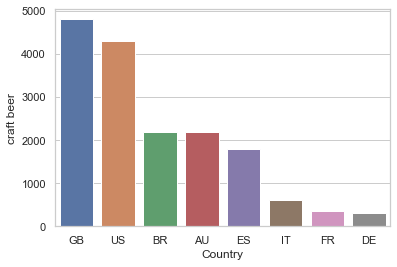

In [163]:
sns.set(style="whitegrid")
sns.barplot(data=dfff ,y="craft beer", x="Country")


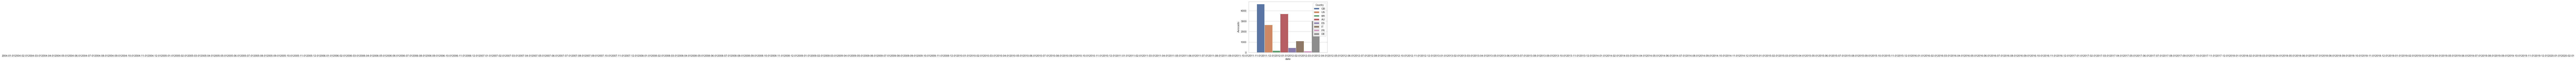

In [168]:
ax = sns.barplot(x="date", y="Avocado", hue="Country", data=dfff)


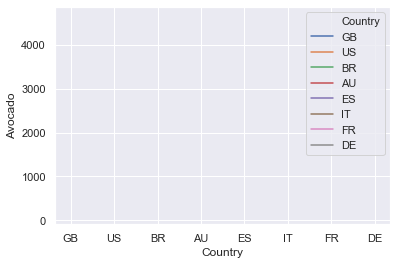

In [184]:
sns.lineplot(x="Country", y="Avocado", hue="Country",
                  data=dfff)

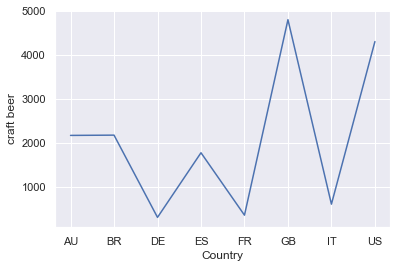

In [193]:
sns.set()


sns.lineplot(x="Country", y="craft beer",  data=dfff)